# Problemas de Estadística Descriptiva

## Ejercicio 1 – ¿Qué tan largos son los títulos de las películas?

En este ejercicio vas a aplicar técnicas de estadística descriptiva sobre un conjunto de datos real: una base con 1000 películas populares del sitio IMDb.

A partir del título de cada película, vas a:
- Calcular la longitud del título (en caracteres).
- Obtener métricas estadísticas clave: media, mediana, moda, rango, varianza, desviación estándar, asimetría y curtosis.
- Identificar los títulos más largos y más cortos.
- Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.


In [2]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, mode
import seaborn as sns

# Cargar dataset de IMDb
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
# Crea una nueva columna llamada 'title_length' con la longitud (número de caracteres) de cada título
df['title_length'] = df["title"].str.replace(" ", "").apply(len)
df

,star_rating,title,content_rating,genre,duration,actors_list,title_length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",22
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",12
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",19
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",13
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",11
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",7
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",22
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",39
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",11


In [4]:
# Calcula media, mediana y moda de la columna 'title_length'
media = df[['title_length']].mean()
print(f"Media = {media}")

mediana = df[['title_length']].median()
print(f"Mediana = {mediana}")

moda = df[['title_length']].mode()
print(f"Moda = {moda}")

Media = title_length    13.682329
dtype: float64
Mediana = title_length    12.0
dtype: float64
Moda =    title_length
0            10


In [5]:
# Calcula el rango, la varianza y la desviación estándar de 'title_length'
rango = df["title_length"].max() - df["title_length"].min()
print(f"Rango = {rango}")

varianza = df["title_length"].var()
print(f"Varianza = {varianza}")

desviacion_estandar = df["title_length"].std()
print(f"Desviación estándar = {desviacion_estandar}")
      


Rango = 55
Varianza = 48.65665060336598
Desviación estándar = 6.975431929519919


In [6]:
# Calcula asimetría y curtosis de la columna 'title_length'
skew = df["title_length"].skew()
print(f"Asimetría = {skew}") 

kurt = df["title_length"].kurt()
print(f"Curtosis = {kurt}") 


Asimetría = 1.4969701378682314
Curtosis = 3.749188508626576


In [7]:
# Imprime el título más corto y el título más largo según su longitud

index_corto = df.index[df["title_length"] == df["title_length"].min()]
index_largo = df.index[df["title_length"] == df["title_length"].max()]

titulo_corto = df.loc[index_corto, "title"]
titulo_largo = df.loc[index_largo, "title"]

print(f"El título más corto es: {titulo_corto.iloc[0]}")
print(f"El título más largo es: {titulo_largo.iloc[0]}")


El título más corto es: M
El título más largo es: Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb


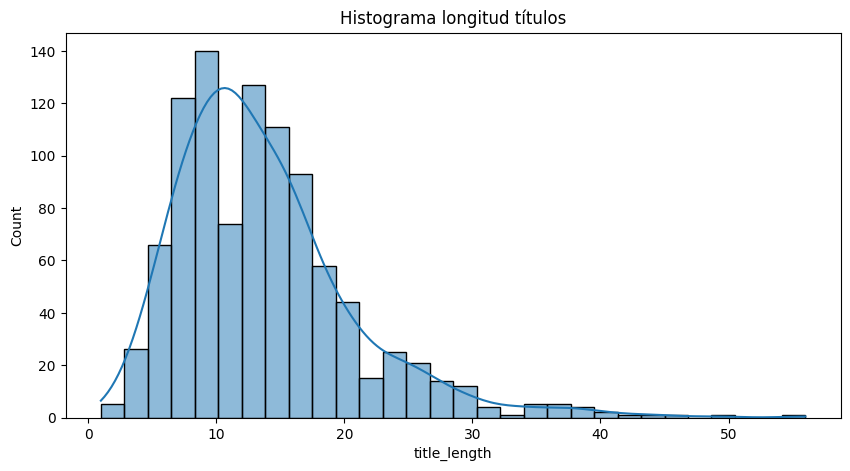

In [8]:
# grafica tus resultados
# Visualizar la distribución de estas longitudes con un histograma y una curva de densidad.

plt.figure(figsize = (10, 5))

sns.histplot(df["title_length"], bins = 30, kde=True)

plt.title("Histograma longitud títulos")
plt.show()



---

## Ejercicio 2 – Cálculo manual de desviación estándar

En este ejercicio vas a calcular manualmente la desviación estándar, seleccionando cinco títulos reales del dataset de películas que cargaste antes.


In [9]:
# Crea una lista con 5 valores reales de df['title_length'], por ejemplo: [10, 13, 14, 18, 22]

lista_valores = df["title_length"].head().values.tolist()
print(lista_valores)

[22, 12, 19, 13, 11]


In [10]:
# Calcula la media de los 5 valores

serie = pd.Series(lista_valores)
media = serie.mean()
print(f"Media = {media}")


Media = 15.4


In [11]:
# Calcula las diferencias al cuadrado con respecto a la media
diff_cuadrado = (serie - media) ** 2
print(diff_cuadrado)

0    43.56
1    11.56
2    12.96
3     5.76
4    19.36
dtype: float64


In [12]:
# Calcula la varianza (promedio de las diferencias al cuadrado) y su raíz cuadrada para obtener la desviación

varianza = diff_cuadrado.mean()
print(f"Varianza = {varianza}")

desviacion_estandar = varianza ** 0.5
print(f"Desviación estándar = {desviacion_estandar}")

Varianza = 18.64
Desviación estándar = 4.317406628984581
